In [1]:
import os
import json
import math
import sys
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
from itertools import combinations_with_replacement, permutations
from sympy.utilities.iterables import multiset_permutations

In [2]:
path = ''

In [5]:
files = sorted(os.listdir(path))
files = [f for f in files if f[-4:] == 'json']

In [6]:
ois = np.empty((0,2))
for file in files:
    with open(os.path.join(path, file)) as f:
        data = json.load(f)
    o = np.empty((len(data),2))
    for i,d in enumerate(data):
        o[i] = [d['time'], float(d['openInterest'])]
    ois = np.vstack((ois, o))

In [7]:
dtnz = np.where(np.diff(ois[:,0]) != 0)[0]

In [8]:
ois = ois[dtnz]

In [9]:
trades = ps.read_csv('/Users/jonkqiku/Downloads/ATOMUSDT-trades-2023-12-01.csv')
trades['is_buyer_maker'] = trades['is_buyer_maker'].astype(int)
trades = trades[['time', 'qty', 'price', 'is_buyer_maker']].to_numpy()

In [10]:
t0 = ois[0,0]
t1 = ois[-1,0]
a = np.where(trades[:,0] > t0)[0][0]
b = np.where(trades[:,0] > t1)[0][0]
trades = trades[a:b]

In [11]:
times_t = trades[:,0]
times_o = ois[:,0]

In [12]:
intervals_o = [(times_o[i-1], times_o[i]) for i in range(1,len(times_o))]

In [13]:
trades_idxs = []
i = 0
for it in intervals_o:
    idxs = []
    while i < len(times_t) and times_t[i] > it[0] and times_t[i] <= it[1]:
        idxs.append(i)
        i += 1
    trades_idxs.append(idxs) 

In [12]:
doi = np.diff(ois[:,1])
adoi = abs(doi)

In [14]:
itv = np.empty(len(trades_idxs))
for i, it in enumerate(trades_idxs):
    if len(it) > 0:
        v = trades[it,1].sum()
    else:
        v = 0
    itv[i] = v

In [15]:
dot = itv - adoi

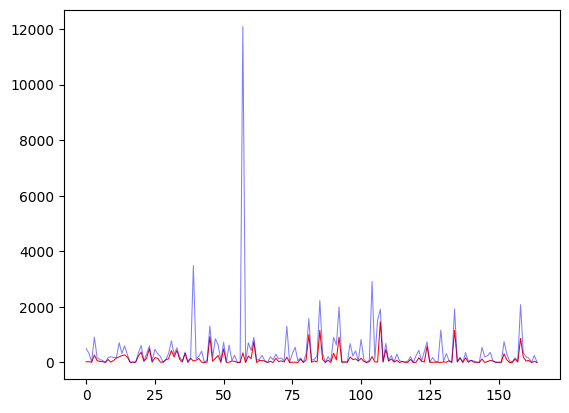

In [16]:
plt.plot(adoi, color='r', lw=.75)
plt.plot(itv, color='b', lw=.75, alpha=.5)

In [17]:
lhs = np.array([len(h) for h in trades_idxs])

In [18]:
(lhs > 15).mean()

0.3878787878787879

In [19]:
dt0 = np.where(np.diff(ois[:,0])==0)[0]
do0 = np.where(np.diff(ois[:,1])==0)[0]
st0 = set(dt0)
so0 = set(do0)
st0.issubset(so0)

True

In [141]:
np.where(lhs==15)

(array([ 10,  64, 156, 163]),)

In [164]:
i = 163
tra = trades[trades_idxs[i]]
qs = tra[:,1]

In [165]:
I = np.load('/Users/jonkqiku/Documents/Projects/Combinations/cwr_15.npy')

In [166]:
v = np.matmul(I, qs)

In [167]:
d = abs(v - doi[i])

In [168]:
j = np.where(d == min(d))[0]

In [169]:
v[j]

array([42.52])

In [170]:
doi[i]

42.519999999552965

In [171]:
I[j]

array([[ 0, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  0,  0, -1, -1]])

In [172]:
I.shape

(14348907, 15)

In [174]:
n = 3**20

In [176]:
(lhs<=15).mean()

0.6121212121212121

In [21]:
s = [-1,0,1]

In [94]:
i = 1
tra = trades[trades_idxs[i]]

In [95]:
qs = tra[:,1]
n = len(qs)

In [96]:
k = len(qs)
N = math.factorial(k+3-1)/math.factorial(3-1) 

In [97]:
len(s)**k

59049

In [98]:
N

239500800.0

In [79]:
I = [[] for _ in range(3**k)]
cs = combinations_with_replacement(s, n)
li = 0
ts = []
for c in cs:
    t0 = time()
    ps = list(multiset_permutations(c))
    t1 = time()
    ts.append(t1-t0)
    l = len(ps)
    for i,p in enumerate(ps):
        I[li+i] = p
    li += l

In [80]:
np.median(ts)

0.0008375644683837891

In [81]:
I = np.array(I)

In [82]:
I.shape

(59049, 10)

In [83]:
v = np.matmul(I, qs)

In [84]:
d = abs(v - doi[6])

In [85]:
j = np.where(d == min(d))[0][0]

In [86]:
doi[6]

30.08999999985099

In [91]:
v[j]

30.089999999999996

In [88]:
qs

array([ 6.75,  0.7 ,  8.16,  0.57,  3.24, 40.  ,  4.06,  5.29,  0.65,
        4.06])

In [89]:
I[j]

array([-1,  0,  0, -1, -1,  1, -1,  0,  1,  1])